#  Chapters 3 & 4

Problems 3.1, 3.2, 3.3, 3.4, 3.6, 3.7, 4.1, 4.3, 4.4

## 3.1

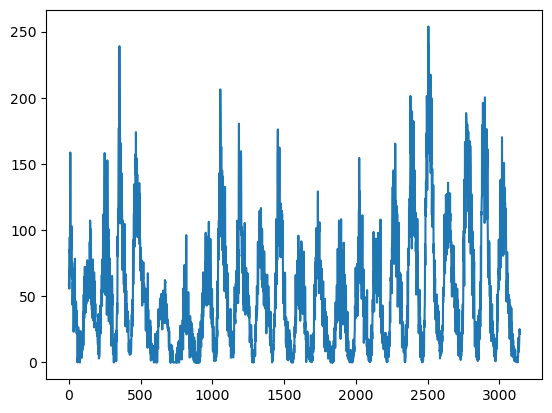

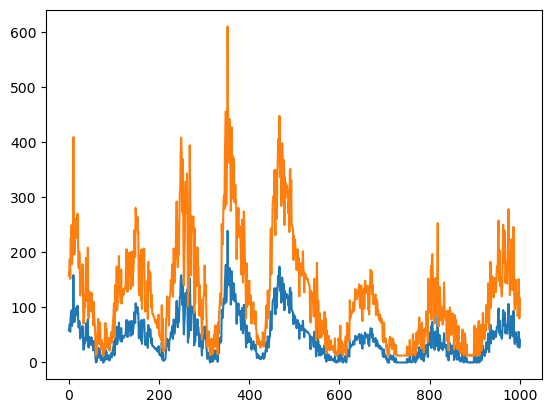

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

sunspots_data = np.loadtxt(r"C:\Users\hello\Desktop\sunspots.txt")   # following book example

x = sunspots_data[:, 0] #getting x values from txt
y = sunspots_data[:, 1] #getting y values from txt
plt.plot(x, y) # making plot for the original x vs y from txt
plt.show()

month = sunspots_data[:1001, 0] #taking only first 1000 data points form first column (month)
sunspot_number = sunspots_data[:1001, 1] #taking only first 1000 data points form first column (sunspot number)

def y_average(y):
    r = 5 # given that we should begin with r = 5
    for m in range(-r,r+1):
        Y_sum = y + m
    return (1/2*r) * Y_sum # this returns the sum which is the constant times y_sum iterated for y+m
  
plt.plot(month, sunspot_number)
plt.plot(month, y_average(sunspot_number))
plt.show()

## 3.2

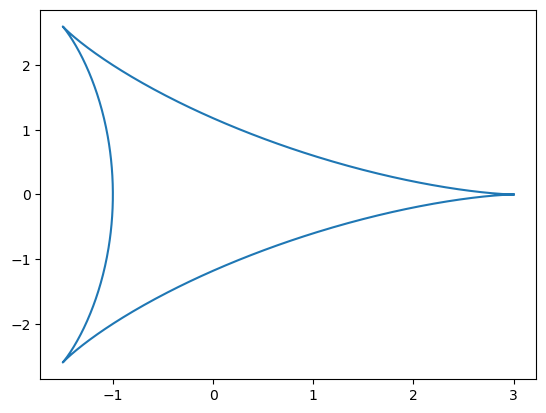

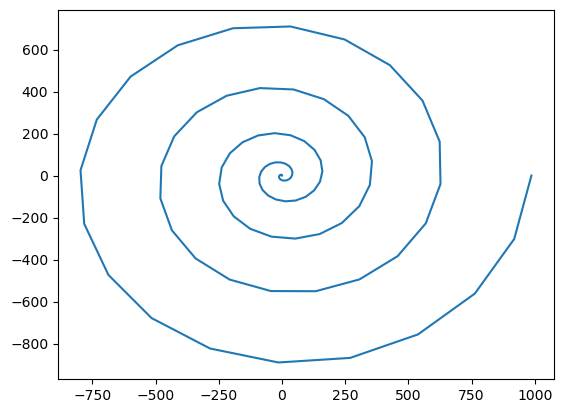

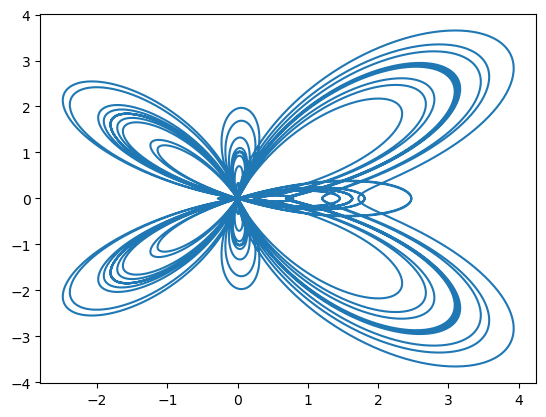

In [2]:
# a ------------------

def deltoid_curve(theta_curve):     # theta goes from 0 to 2 pi
    theta = [i*2*math.pi/(theta_curve-1) for i in range(theta_curve)]
    x = [2*math.cos(t)+math.cos(2*t) for t in theta]
    y = [2*math.sin(t)-math.sin(2*t) for t in theta]
    return x, y 

x,y = deltoid_curve(1000)

plt.plot(x, y)
plt.show()

# b ------------------

def cartesian_conversion(r, theta_range):    
    x = r*np.cos(theta_range) # x = r cos theta   conversion
    y = r*np.sin(theta_range) # y = r sin theta   given by problem statement
    return x, y

def spiral(theta_spiral, spiral_steps):       
    theta = np.linspace(0,theta_spiral,spiral_steps)
    r = theta**2 # r = theta^2 given by problem statement
    return r, theta
r, theta = spiral(10*np.pi, 100)   # theta goes from 0 to 10 pi

x,y = cartesian_conversion(r, theta)
plt.plot(x,y)
plt.show()

# c ------------------

# this is same as part b but now the range is different, 0 to 24 pi, and the funciton is different, else same
def feys_function(theta_feys, feys_steps):        
    theta = [i*theta_feys/(feys_steps-1) for i in range(feys_steps)]
    r = [math.exp(math.cos(t)) - 2*math.cos(4*t) + (math.sin(t/12))**5 for t in theta]
    return r, theta

r, theta = feys_function(24 * math.pi, 10000)   # theta goes from 0 to 24 pi

x, y = cartesian_conversion(r, theta)
plt.plot(x, y)
plt.show()

## 3.3

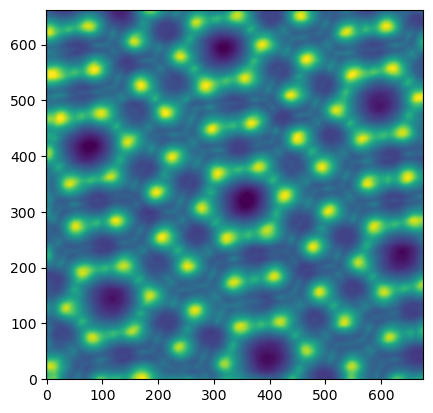

In [3]:
# similar to example 3.3 in book, Density plot

from pylab import imshow, show

surface_data = np.loadtxt(r"C:\Users\hello\Desktop\stm.txt") # txt contains an array of values
                            # program puts values in a 2D array using loadtxt then creates the density plot with imshow
    
imshow(surface_data, origin = "lower")
# the origin = lower flips the density plot top to bottom per convention

show()

## 3.4

In [4]:
import vpython as vp

# a ------------------

def NaCl_lattice():
    # beginning with shell code given by book in Example 3.2:
    L = 5
    R = 0.3
    count = 1
    for i in range(-L,L+1):
        for j in range(-L,L+1):
            for k in range(-L,L+1):
                if count%2 == 0:
                    vp.sphere(pos=vp.vector(i,j,k), radius=R, color=vp.color.red)
                else:
                    vp.sphere(pos=vp.vector(i,j,k), radius=R, color=vp.color.green)
                count+=1 
#NaCl_lattice()        # this should be uncommented to see the non-fcc lattice, vpython does not run both at same time

# b ------------------

# beginning with same shell code

def face_centered_cubic_lattice():
    L = 5
    R = 0.3
    for i in range(-L,L+1):
        for j in range(-L,L+1):
            for k in range(-L,L+1):
                corner_positions = [vp.vector(i,j,k),
                                    vp.vector(i+1,j,k),
                                    vp.vector(i,j+1,k),
                                    vp.vector(i,j,k+1)]

                face_center_positions = [vp.vector(i+0.5,j+0.5,k),  # 1/2 for center of each face
                                         vp.vector(i+0.5,j,k+0.5),
                                         vp.vector(i,j+0.5,k+0.5),
                                         vp.vector(i+0.5,j+0.5,k+1)]

                for pos in corner_positions: # iterating the colors
                    vp.sphere(pos=pos, radius=R, color=vp.color.red)

                for pos in face_center_positions:
                    vp.sphere(pos=pos, radius=R, color=vp.color.green)

face_centered_cubic_lattice()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.6

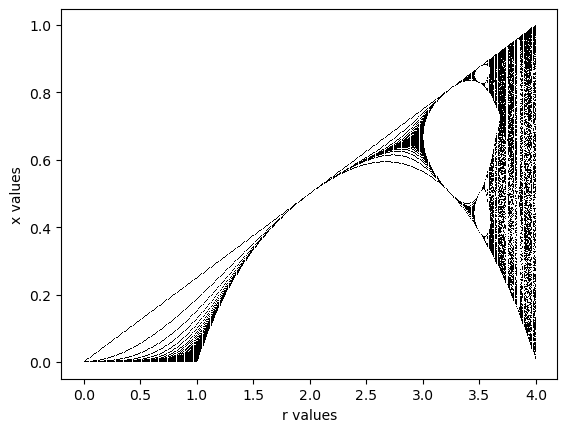

In [5]:
# from book's comment 10, starting with array for r and array for x

r = np.arange(0, 4, 0.01)  # values from 1 to 4 in steps of .01
x = np.full_like(r, 0.5)  # x = .5 given value of constant r

for i in r:
    x = r * x * (1 - x)  # logistic map is definied by this equation
    plt.plot(r, x, ',k') # printing as k as book suggests

plt.ylabel("x values")
plt.xlabel("r values")
plt.show()

# a: All values would come together into one value at a fixed point.
#    A limit cycle would show values in a range that are bound to certain numbers.
#    Chaos is when the plot looks to be random.
# b: At r value of 3.5 the plot looks to move from orderly to chaotic, as points 
#    had some symmetry but now are everywhere along the y axis.

## 3.7

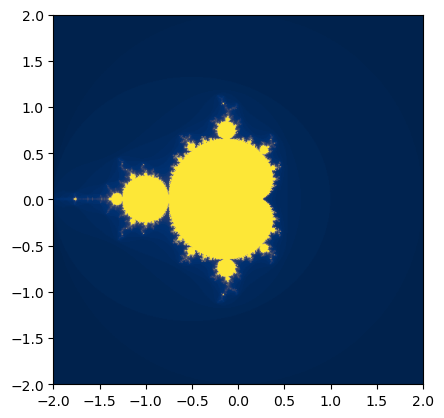

In [6]:
def mandelbrot(c, max_iteration): # c takes a complex number that is some point on the complex plane
    z = 0 # z is complex that is initialized to 0
    n = 0 # iteration is counted by n, set to 0
    while abs(z) <= 2 and n < max_iteration: # this runs until the absolute value of z is less than or 
        z = z*z + c #updates z value         # equal to 2, or the max iteration is reached
        n += 1      #updates iteration count
    return n

resolution = 500 # number of points along each axis
x_min, x_max = -2, 2 #real plane range
y_min, y_max = -2, 2 #complex plane range

x = np.linspace(x_min, x_max, resolution) #creates evenly spaced points of size resolution between the given range
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y) # np.meshgrid combines x and y arrays to create grid of complex numbers
Z = X + 1j * Y # 2D array of real x and imaginary y

mandelbrot_iterations = np.frompyfunc(lambda c: mandelbrot(c, 100), 1, 1)(Z).astype(float)

plt.figure()
plt.imshow(mandelbrot_iterations, extent=(x_min, x_max, y_min, y_max), cmap='cividis', origin='lower') # changing origin as for 
plt.show()                                                                                             # problem 3.3

# 4x4 plot as requested by the given range for real and complex

## 4.1

In [7]:
inp = int(input('What number should I take the factorial of? ')) # changing from the taken string to integer

def factorial(inp): # taking factorial
    if inp == 1: # one factorial is just 1
        return 1
    else: 
        return inp*factorial(inp-1)

print('The factorial is: ', factorial(inp))  # this line shows the value of factorial of 200 for however long python can store 
                                             # digits I believe.
    
    
print('The factorial is: ', factorial(float(inp))) # here I make the input into a float so the factorial taken is of a float rather than integer

# (a) Integer was calculated to however long python can store values, (b) but float seems
# to have a limit after which it shows as infinity.

What number should I take the factorial of? 200
The factorial is:  788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
The factorial is:  inf


## 4.3

In [8]:
# first define f(x) as it is in df/dx equation 
def f(x):
    f = x * (x-1)
    return f

# df/dx = lim as delta -> 0 of [f(x+delta) - f(x) / delta]

def deriv(number, delta): # derivative
    x = number
    d = delta
    return (f(x+d)-f(x))/d

deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

for delta in deltas: # going through the different values given
    print("Derivative of delta {} is: {}".format(delta, deriv(1, delta))) # this replaces the {} in the string with the 
                                                                          # value of delta, and derivative of delta

# (b) Subtracting very small float digits results in lower accuracy.

Derivative of delta 0.01 is: 1.010000000000001
Derivative of delta 0.0001 is: 1.0000999999998899
Derivative of delta 1e-06 is: 1.0000009999177333
Derivative of delta 1e-08 is: 1.0000000039225287
Derivative of delta 1e-10 is: 1.000000082840371
Derivative of delta 1e-12 is: 1.0000889005833413
Derivative of delta 1e-14 is: 0.9992007221626509


## 4.4

In [15]:
import time

def f(x):
    return np.sqrt(1 - x**2) # given equation for y sub k

def integral_with_slices(amount_slices):
    h = 2 / amount_slices # this gives the width of each slice
    total = 0.0 # make initial total sum to 0
    for k in range(amount_slices):
        x_k = -1 + h*k  # x of left endpoint of slice
        total += h*f(x_k) # adds area of current slice to total
    return total

def measure_time(some_function, *args): # *args allows to pass any number of arguments into function
    start_time = time.time() #records current time        # documentation - https://www.geeksforgeeks.org/args-kwargs-python/
    result = some_function(*args) #runs the function
    end_time = time.time() #records current time again right after running function
    return result, end_time-start_time # thus now we can subtract the 2 recorded times for the time difference to run function

# for N = 100
result_1, time_1 = measure_time(integral_with_slices, 100)
print(result_1)
print("Execution time:", time_1)

# for any N that can be calculated before one second
result_2, time_2 = measure_time(integral_with_slices, 790000)
print(result_2)
print("Execution time:", time_2) # does not spicify how many digits of accuracy so just went close with many digits.
                                 # this time varies on machine, and even on one machine it can be semi consistent.
                                 # it randomly goes above 1 sec (machine background tasks?, also if many items in notebook).

1.5691342555492505
Execution time: 0.0009982585906982422
1.5707963244264185
Execution time: 0.948775053024292
